# GBM classifier techniques
## XGBoost
Datset used is the boston dataset


In [ ]:
from sklearn.datasets import load_boston
import xgboost as xgb

boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
print(boston.data.shape)

(506, 13)


In [ ]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
data['PRICE'] = boston.target
data=data.dropna()

In [ ]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xgb_classsifer = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xgb_classsifer.fit(X_train,y_train)

preds = xgb_classsifer.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.558934


In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[01:17:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:17:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.679234,0.025626,21.677613,0.050617
1,19.772293,0.016054,19.773320,0.020571
2,18.049563,0.058904,18.065856,0.082746
3,16.430113,0.013615,16.492199,0.020919
4,15.025977,0.062132,15.132644,0.073104


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[01:17:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


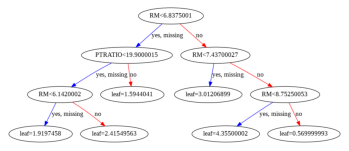

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

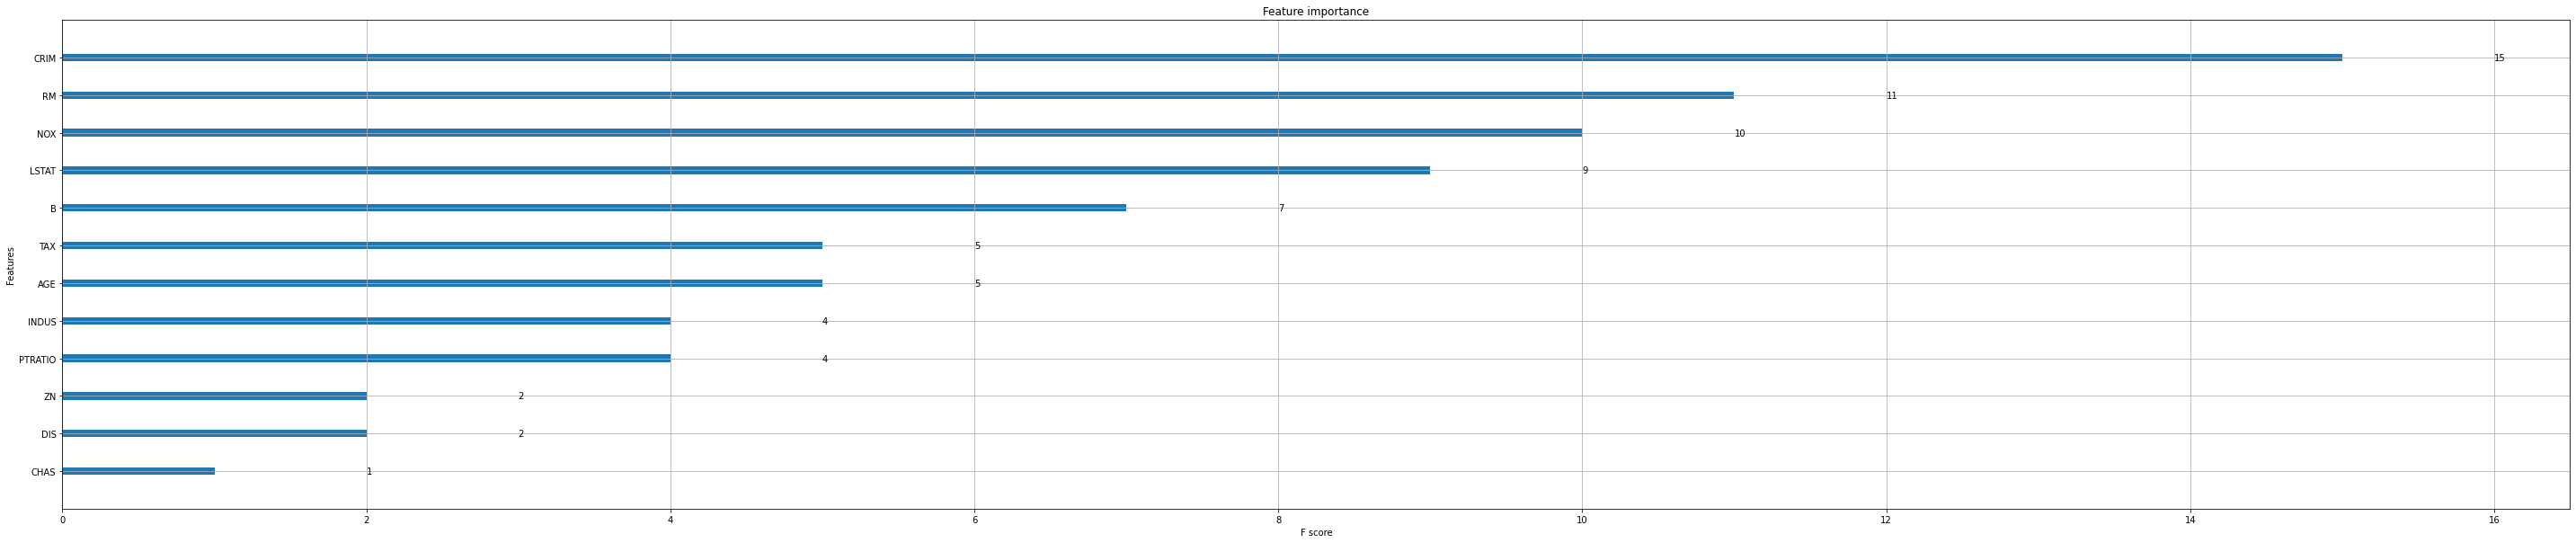

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

The random forest classifier is shown

### Catboost
For this we are making use of titanic dataset

In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.4 MB/s 


In [ ]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_catboost_classifier = pd.read_csv('/content/drive/MyDrive/DataMining/Assignment6/Datset/titanic.csv')
df_catboost_classifier.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_catboost_classifier.dropna(subset=['Survived'],inplace=True)

In [ ]:
X = df_catboost_classifier[['Pclass','Sex', 'Age', 'Fare']]
y = df_catboost_classifier['Survived']

In [ ]:
X['Pclass'] = X['Pclass'].astype('str')
X['Fare'].fillna(0,inplace=True)
X['Age'].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
def get_categorical_indicies(X):
  cats = []
  for col in X.columns:
    if is_numeric_dtype(X[col]):
      pass
    else:
      cats.append(col)
  cat_indicies = []
  for col in cats:
    cat_indicies.append(X.columns.get_loc(col))
  return cat_indicies
categorical_indicies = get_categorical_indicies(X)

In [ ]:
def convert_cats(X):
  cats = []
  for col in X.columns:
    if is_numeric_dtype(X[col]):
      pass
    else:
      cats.append(col)
  cat_indicies = []
  for col in cats:
    X[col] = X[col].astype('category')
convert_cats(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [ ]:
print('Test Survival Rate:',y_test.sum()/y_test.count())

Test Survival Rate: 0.3854748603351955


In [ ]:
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')

In [ ]:
train_df = pd.concat([X,y],axis=1)
survived = train_df[train_df['Survived']==1]
deceased = train_df[train_df['Survived']==0]
deceased = deceased.sample(n=len(survived), random_state=101)
train_df = pd.concat([survived,deceased],axis=0)
X_train = train_df.drop('Survived',axis=1)
y_train = train_df['Survived']
train_dataset = cb.Pool(X_train,y_train, cat_features=categorical_indicies)
test_dataset = cb.Pool(X_test,y_test, cat_features=categorical_indicies)

In [ ]:
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6, 10],
'l2_leaf_reg': [1, 3, 5,],
'iterations': [50, 100, 150]}
model.grid_search(grid,train_dataset)


Streaming output truncated to the last 5000 lines.
86:	learn: 0.8062157	test: 0.7445255	best: 0.7810219 (1)	total: 108ms	remaining: 16.1ms
87:	learn: 0.8062157	test: 0.7299270	best: 0.7810219 (1)	total: 109ms	remaining: 14.8ms
88:	learn: 0.8043876	test: 0.7299270	best: 0.7810219 (1)	total: 110ms	remaining: 13.6ms
89:	learn: 0.8025594	test: 0.7299270	best: 0.7810219 (1)	total: 111ms	remaining: 12.3ms
90:	learn: 0.8043876	test: 0.7299270	best: 0.7810219 (1)	total: 112ms	remaining: 11.1ms
91:	learn: 0.8025594	test: 0.7299270	best: 0.7810219 (1)	total: 113ms	remaining: 9.86ms
92:	learn: 0.8025594	test: 0.7445255	best: 0.7810219 (1)	total: 115ms	remaining: 8.63ms
93:	learn: 0.8007313	test: 0.7445255	best: 0.7810219 (1)	total: 116ms	remaining: 7.4ms
94:	learn: 0.8007313	test: 0.7445255	best: 0.7810219 (1)	total: 117ms	remaining: 6.16ms
95:	learn: 0.8062157	test: 0.7299270	best: 0.7810219 (1)	total: 118ms	remaining: 4.93ms
96:	learn: 0.8062157	test: 0.7299270	best: 0.7810219 (1)	total: 120ms	

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49],
            

In [ ]:
model.get_params()

{'depth': 10,
 'eval_metric': 'Accuracy',
 'iterations': 50,
 'l2_leaf_reg': 1,
 'learning_rate': 0.03,
 'loss_function': 'Logloss'}

In [ ]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       110
           1       0.76      0.57      0.65        69

    accuracy                           0.77       179
   macro avg       0.77      0.73      0.74       179
weighted avg       0.77      0.77      0.76       179



## LightGBM Classifier

In [ ]:
df_light_gbm=pd.read_csv("/content/drive/MyDrive/DataMining/Assignment6/Datset/Breast_cancer_data.csv")

In [ ]:
df_light_gbm.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
X = df_light_gbm[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df_light_gbm['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
# predict the results
y_pred=clf.predict(X_test)

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9240


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 55   8]
 [  5 103]]

True Positives(TP) =  55

True Negatives(TN) =  103

False Positives(FP) =  8

False Negatives(FN) =  5


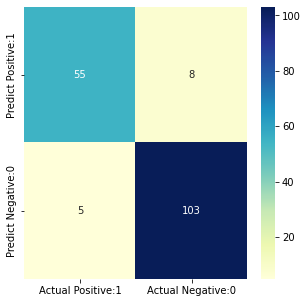

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Randomforest Classifier

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [ ]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.517250
petal length (cm)    0.374161
sepal length (cm)    0.085891
sepal width (cm)     0.022698
dtype: float64

No handles with labels found to put in legend.


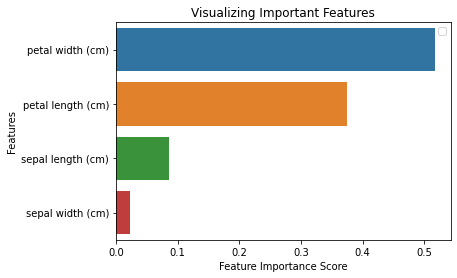

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


### Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df_dec_classifier = pd.read_csv("/content/drive/MyDrive/DataMining/Assignment6/Datset/diabetes.csv")

In [ ]:
df_dec_classifier.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df_dec_classifier[feature_cols] # Features
y = df_dec_classifier.Outcome # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


In [ ]:
!pip install graphviz
!pip install pydotplus

! pip install six

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

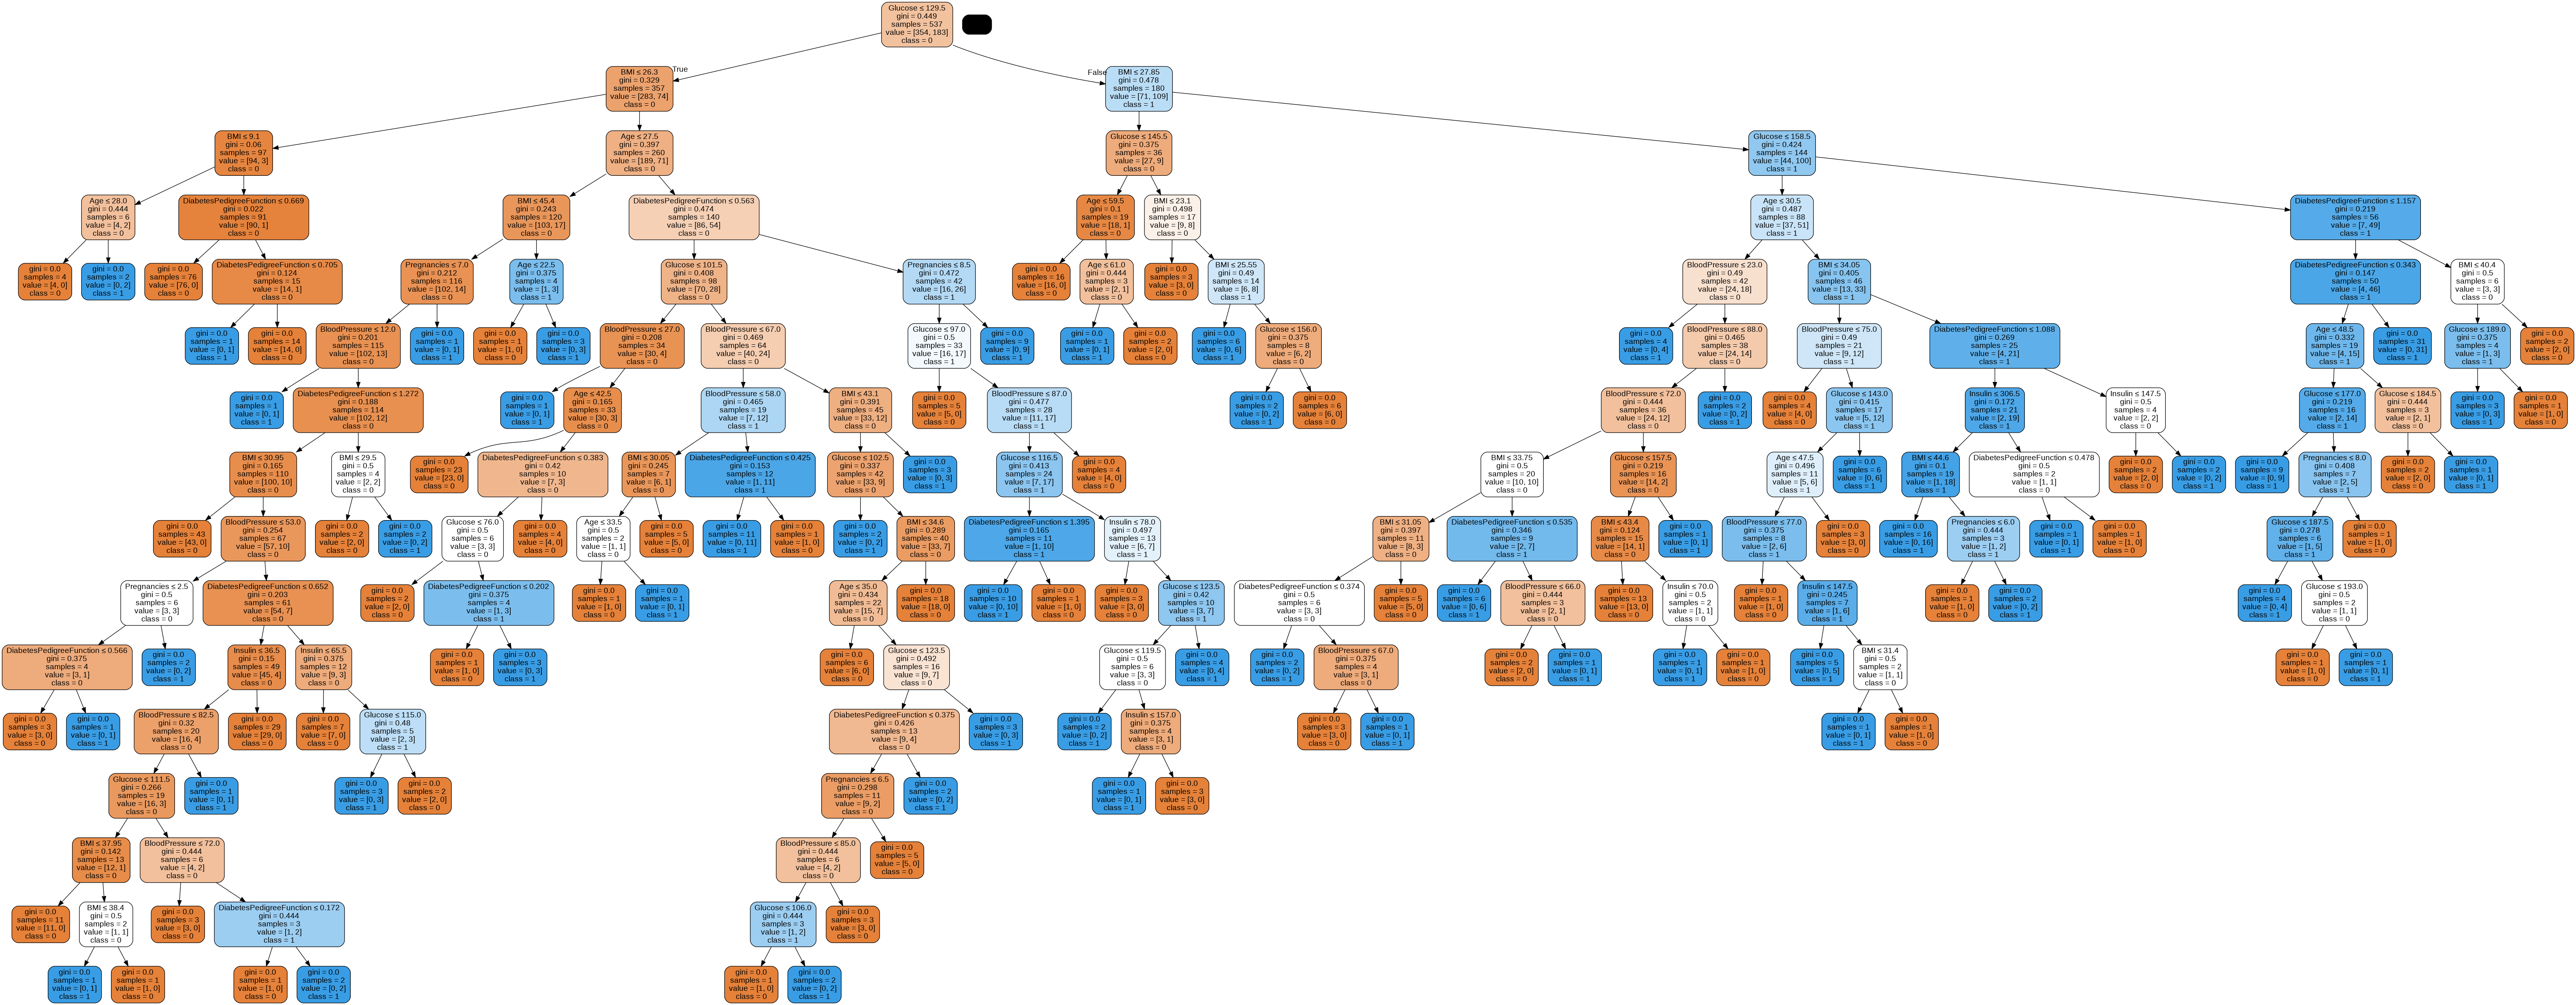

In [ ]:
graph.write_png('diabetes.png')
Image(graph.create_png())

#  Regression techniques
## XGBoost

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [ ]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
data['PRICE'] = boston.target

In [ ]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[01:18:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.449300


In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[01:18:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:18:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.679234,0.025626,21.677613,0.050617
1,19.772293,0.016054,19.773320,0.020571
2,18.049563,0.058904,18.065856,0.082746
3,16.430113,0.013615,16.492199,0.020919
4,15.025977,0.062132,15.132644,0.073104


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[01:18:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


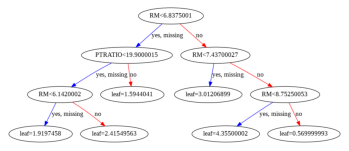

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

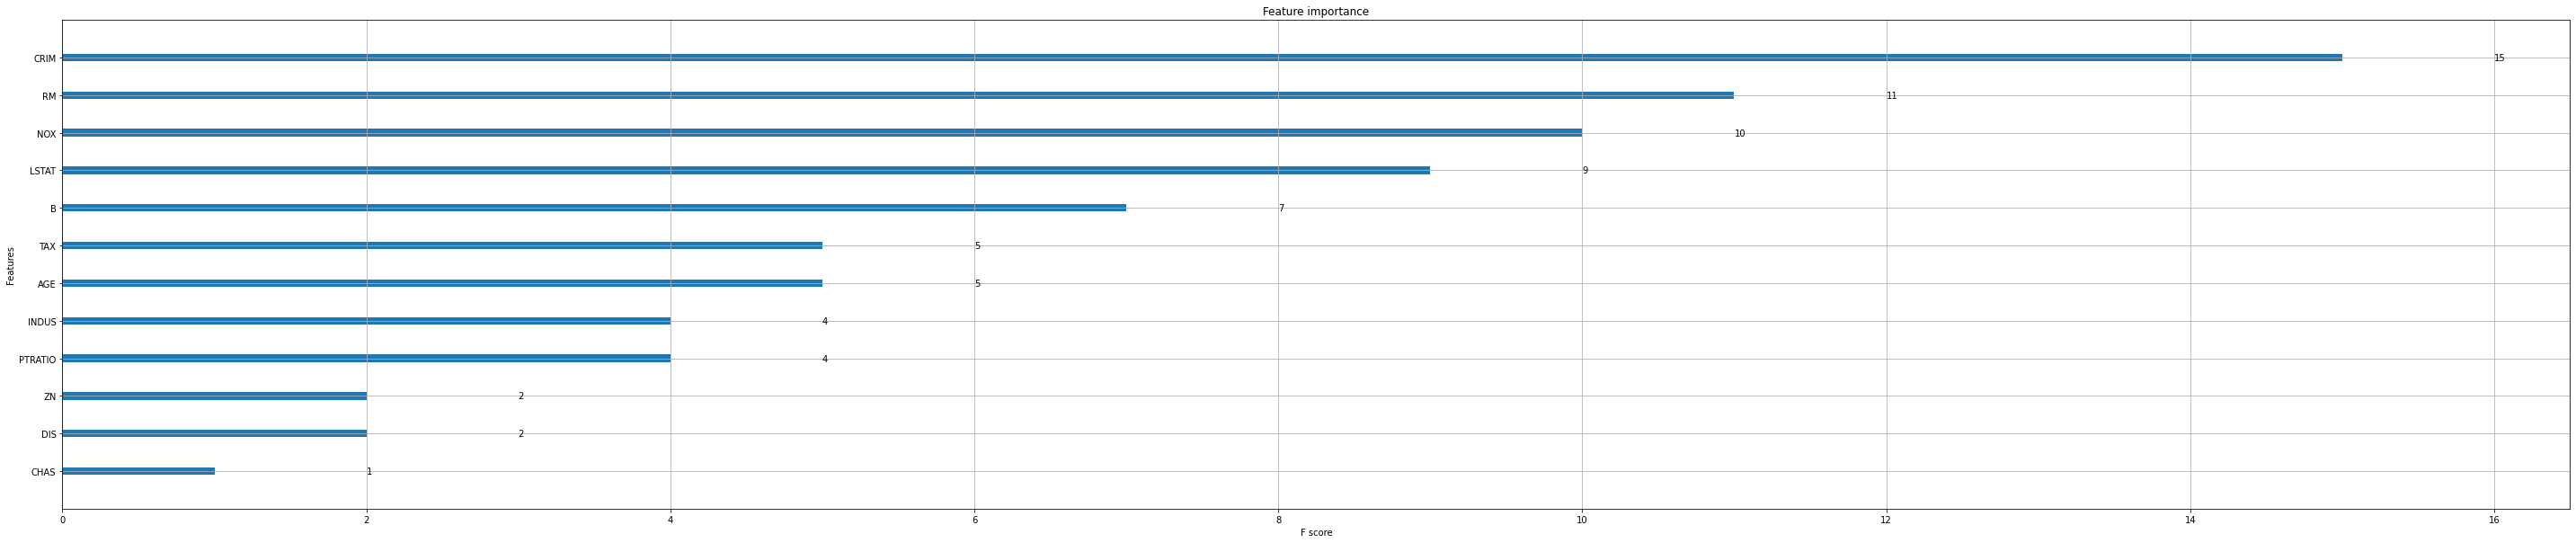

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Catboost regression

In [ ]:
import catboost as cb

In [ ]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [ ]:
model = cb.CatBoostRegressor()

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)


Streaming output truncated to the last 5000 lines.
156:	learn: 2.3568713	test: 4.0438226	best: 4.0438226 (156)	total: 385ms	remaining: 105ms
157:	learn: 2.3458261	test: 4.0374942	best: 4.0374942 (157)	total: 387ms	remaining: 103ms
158:	learn: 2.3378000	test: 4.0289151	best: 4.0289151 (158)	total: 393ms	remaining: 101ms
159:	learn: 2.3263565	test: 4.0222701	best: 4.0222701 (159)	total: 396ms	remaining: 98.9ms
160:	learn: 2.3130497	test: 4.0050767	best: 4.0050767 (160)	total: 398ms	remaining: 96.4ms
161:	learn: 2.2984671	test: 3.9892549	best: 3.9892549 (161)	total: 400ms	remaining: 93.9ms
162:	learn: 2.2886241	test: 3.9729193	best: 3.9729193 (162)	total: 402ms	remaining: 91.4ms
163:	learn: 2.2781127	test: 3.9585632	best: 3.9585632 (163)	total: 405ms	remaining: 88.8ms
164:	learn: 2.2664088	test: 3.9530806	best: 3.9530806 (164)	total: 407ms	remaining: 86.3ms
165:	learn: 2.2555059	test: 3.9507522	best: 3.9507522 (165)	total: 409ms	remaining: 83.8ms
166:	learn: 2.2449207	test: 3.9378388	best

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [ ]:
from sklearn.metrics import r2_score
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 4.04
R2: 0.80


Text(0.5, 0, 'CatBoost Feature Importance')

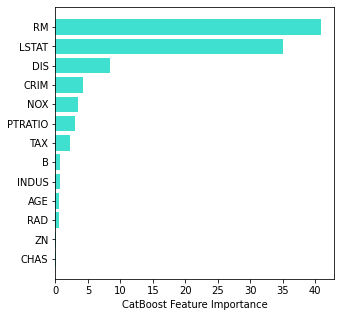

In [ ]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

## LightGBM Regression

In [ ]:
import lightgbm as lgbm
reg = lgbm.LGBMRegressor() 

In [ ]:
reg.fit(X, y)


LGBMRegressor()

In [ ]:
from sklearn.metrics import r2_score
pred = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 1.67
R2: 0.97


### Gradient Boost Ranking techniques

In [ ]:
from time import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [ ]:
df_ranking=pd.read_csv("/content/drive/MyDrive/DataMining/Assignment6/Datset/Breast_cancer_data.csv")
df_ranking.head(1)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.1184,0


In [ ]:
X=df_ranking.drop('diagnosis', axis=1)

In [ ]:
y=df_ranking.diagnosis

In [ ]:
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X, y, test_size=0.1)

In [ ]:
xgb = XGBClassifier(n_estimators=2000,
                    tree_method='hist',
                    subsample=0.67,
                    colsample_level=0.06,
                    verbose=0,
                    n_jobs=6,
                    random_state=1234)

In [ ]:
cb = CatBoostClassifier(n_estimators=2000,
                        colsample_bylevel=0.06,
                        max_leaves=31,
                        subsample=0.67,
                        verbose=0,
                        thread_count=6,
                        random_state=1234)


In [ ]:
lgbm = LGBMClassifier(n_estimators=2000,
                      feature_fraction=0.06,
                      bagging_fraction=0.67,
                      bagging_freq=1,
                      verbose=0,
                      n_jobs=6,
                      random_state=1234)


In [ ]:
models = [xgb,cb, lgbm]
model_names = [i.__class__.__name__ for i in models]

In [ ]:
es_models = ['XGBClassifier',
             'CatBoostClassifier',
             'LGBMClassifier']


In [ ]:
df_results = pd.DataFrame(columns=['accuracy', 'run_time'])
for m, n in zip(models, model_names):
    
    start_time = time()
    if n in es_models:
        m.fit(X_train_sub,
              y_train_sub,
              eval_set = [(X_valid, y_valid)],
              early_stopping_rounds=15,
              verbose=0)
    else:
        m.fit(X_train, y_train)
    
    run_time = time() - start_time
    accuracy = np.mean(m.predict(X_valid) == y_valid)
        
    df_results.loc[n] = [accuracy, run_time]
    
    del m

In [ ]:
df_results

,accuracy,run_time
XGBClassifier,0.894737,0.072790
CatBoostClassifier,0.859649,0.069092
LGBMClassifier,0.894737,0.297040


The above table shows us that the XGBClassifier and LGBMClassifier gives the highest accuracy but the run time is high. CatBoost gives a lower accuracy and better runtime.